In [1]:
import numpy as np
import math
import scipy.io
import matplotlib.pyplot as mpl
from mpl_toolkits import mplot3d
from scipy import signal

In [2]:
#Part A

def DOG(sigma_c, sigma_s, x, y):
    gaussian_c = (1/(2*math.pi*(sigma_c**2)))*math.exp(-(x**2+y**2)/(2*(sigma_c**2)))
    gaussian_s = (1/(2*math.pi*(sigma_s**2)))*math.exp(-(x**2+y**2)/(2*(sigma_s**2)))
    return gaussian_c - gaussian_s


In [3]:
def DOG_receptive_field(sigma_c, sigma_s, resultRowSize, resultColSize):
    result = np.zeros((resultRowSize, resultColSize))
    for i in range(resultRowSize):
        for j in range(resultColSize):
            result[i][j] = DOG(sigma_c, sigma_s, i-(resultRowSize/2), j-(resultRowSize/2))
    return result

<Figure size 432x288 with 0 Axes>

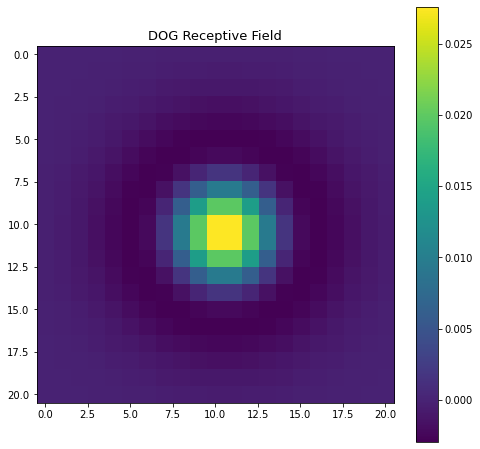

<Figure size 432x288 with 0 Axes>

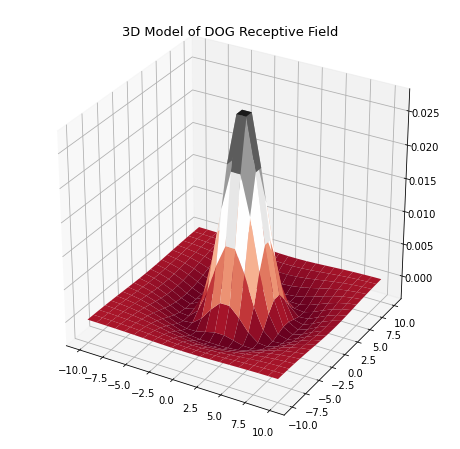

In [4]:
Dog_receptive_field = DOG_receptive_field(2,4,21,21)

# Plot for DOG Receptive Field
figure = 0
mpl.figure(figure)
mpl.figure(figsize=(8,8))
mpl.title('DOG Receptive Field', fontsize=13)
mpl.imshow(Dog_receptive_field)
mpl.colorbar()
mpl.show(block=False)

# 3D Plot for Gabor Receptive Field with Theta = pi/2
figure += 1
mpl.figure(figure)
mpl.figure(figsize=(8,8))
X = Y = np.linspace(-10, 10, 21)
X, Y = np.meshgrid(X, Y)
mpl.axes(projection='3d').plot_surface(X, Y, Dog_receptive_field, cmap='RdGy', edgecolor='none')
mpl.title('3D Model of DOG Receptive Field', fontsize=13)
mpl.show()

The size of the image is: (480, 512, 3)


<Figure size 432x288 with 0 Axes>

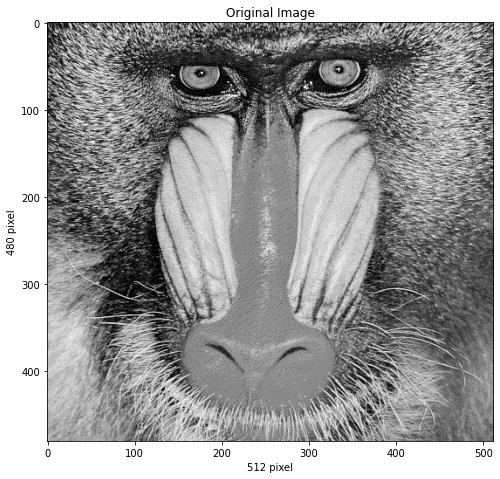

<Figure size 432x288 with 0 Axes>

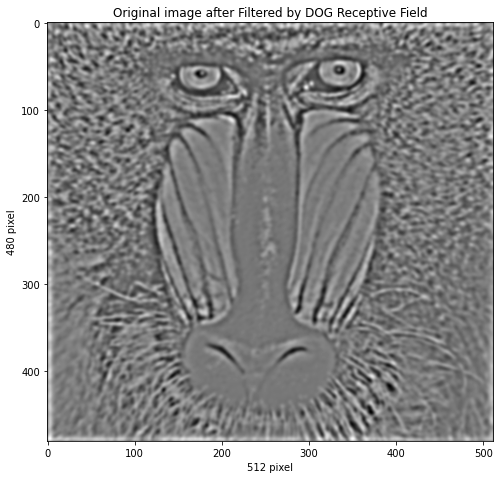

In [5]:
# Part B

# Plot of original image
figure += 1
mpl.figure(figure)
mpl.figure(figsize=(8,8))
original_image = mpl.imread('hw2_image.bmp')
print('The size of the image is: %s' % str(np.shape(original_image)))
mpl.imshow(original_image)
mpl.title("Original Image")
mpl.xlabel('512 pixel')
mpl.ylabel('480 pixel')
mpl.show()

# Plot of original image convolved with DOG receptive field
figure += 1
mpl.figure(figure)
mpl.figure(figsize=(8,8))
convolved_image = scipy.signal.convolve(original_image[:, :, 1], Dog_receptive_field, mode='same')   
mpl.imshow(convolved_image, cmap='gray')
mpl.title("Original image after Filtered by DOG Receptive Field")
mpl.xlabel('512 pixel')
mpl.ylabel('480 pixel')
mpl.show()


In [6]:
#Part C

def edge_detect(image, threshold):
    result = np.zeros(np.shape(image))
    for i in range(len(image[:,0])):
        for j in range(len(image[0])):
            if image[i,j] > threshold:
                result[i,j] = 1
            else:
                result[i,j] = 0
    return result

<Figure size 432x288 with 0 Axes>

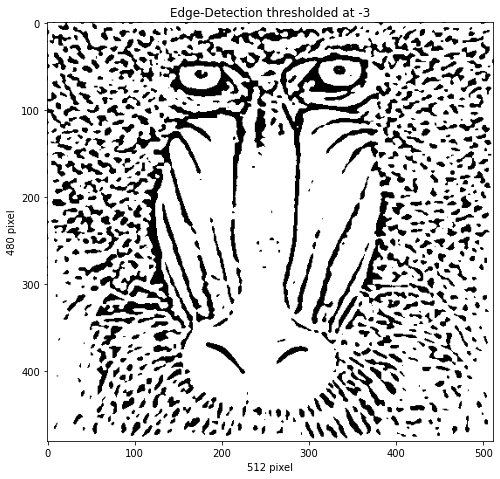

<Figure size 432x288 with 0 Axes>

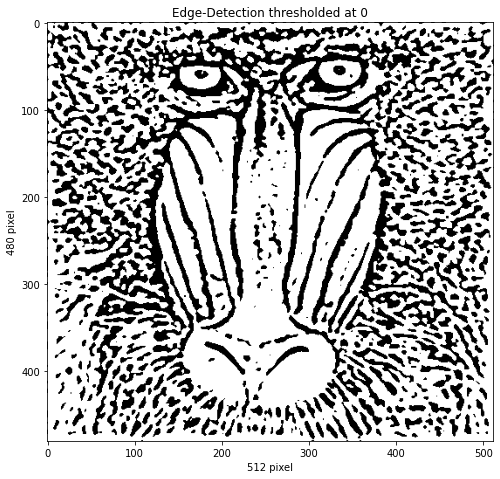

<Figure size 432x288 with 0 Axes>

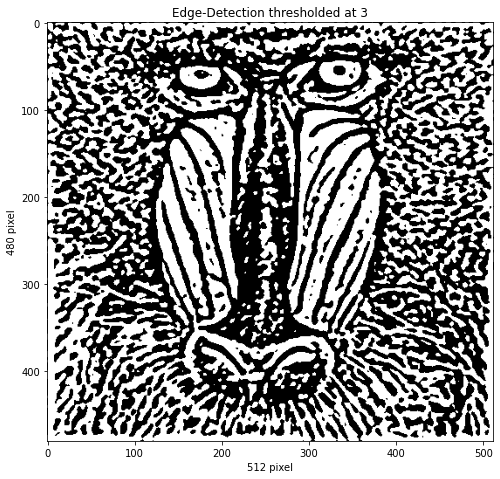

In [7]:
# Plot for edge detection with different thresholds (-3, 0, 3)
for i in range(-1,2):
    edged_image = edge_detect(convolved_image,i*3)
    figure += 1
    mpl.figure(figure)
    mpl.figure(figsize=(8,8))
    mpl.imshow(edged_image, cmap='gray')
    mpl.title("Edge-Detection thresholded at %s" % str(i*3))
    mpl.xlabel('512 pixel')
    mpl.ylabel('480 pixel')
    mpl.show()

In [8]:
#Part D

def Gabor(x, sigma_l, sigma_w, lambdaa, theta, phi):
    k = [math.cos(theta),math.sin(theta)]
    k_orthogonal = [- math.sin(theta), math.cos(theta)]
    k = np.array(k)
    k_orthogonal = np.array(k_orthogonal)
    result = math.exp(-(k.dot(x)**2)/(2*sigma_l**2) - (k_orthogonal.dot(x)**2) / (2 * (sigma_w**2))) * math.cos(2* math.pi * (k_orthogonal.dot(x))/lambdaa + phi)
    return result

In [9]:
def Gabor_receptive_field(resultRowSize, resultColSize, sigma_l, sigma_w, lambdaa, theta, phi):
    result = np.zeros((resultRowSize, resultColSize))
    for i in range(resultRowSize):
        for j in range(resultColSize):
            result[i][j] = Gabor([i-(resultRowSize/2), j-(resultRowSize/2)], sigma_l, sigma_w, lambdaa, theta, phi)
    return result

<Figure size 432x288 with 0 Axes>

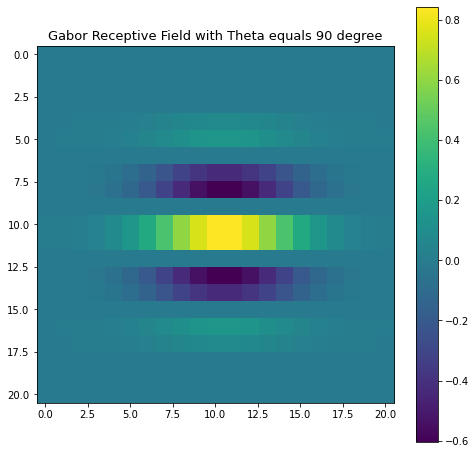

<Figure size 432x288 with 0 Axes>

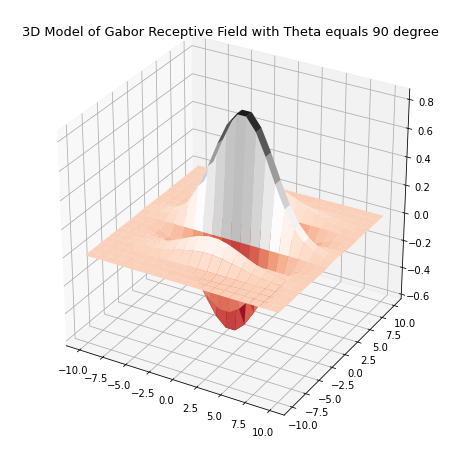

In [10]:
gabor_field = Gabor_receptive_field(21, 21, 3, 3, 6, math.pi/2, 0)

# Plot for Gabor Receptive Field with Theta = pi/2
figure += 1
mpl.figure(figure)
mpl.figure(figsize=(8,8))
mpl.title('Gabor Receptive Field with Theta equals 90 degree', fontsize=13)
mpl.imshow(gabor_field)
mpl.colorbar()
mpl.show()

# 3D Plot for Gabor Receptive Field with Theta = pi/2
figure += 1
mpl.figure(figure)
mpl.figure(figsize=(8,8))
X = Y = np.linspace(-10, 10, 21)
X, Y = np.meshgrid(X, Y)
mpl.axes(projection='3d').plot_surface(X, Y, gabor_field, cmap='RdGy', edgecolor='none')
mpl.title('3D Model of Gabor Receptive Field with Theta equals 90 degree', fontsize=13)
mpl.show()

<Figure size 432x288 with 0 Axes>

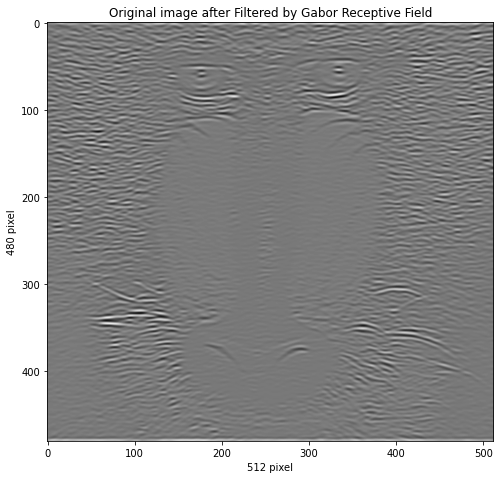

In [11]:
#Part E

#Plot for gabor field convoluted image
figure += 1
mpl.figure(figure)
mpl.figure(figsize=(8,8))
convolved_gabor_image = scipy.signal.convolve(original_image[:, :, 1], gabor_field, mode='same')   
mpl.imshow(convolved_gabor_image, cmap='gray')
mpl.title("Original image after Filtered by Gabor Receptive Field")
mpl.xlabel('512 pixel')
mpl.ylabel('480 pixel')
mpl.show()

<Figure size 432x288 with 0 Axes>

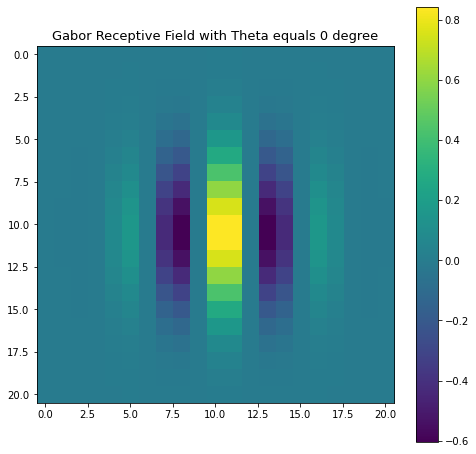

<Figure size 432x288 with 0 Axes>

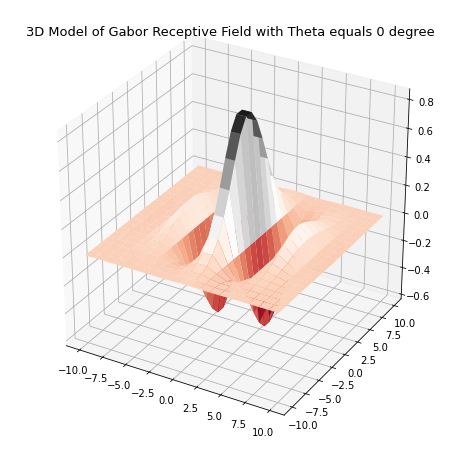

<Figure size 432x288 with 0 Axes>

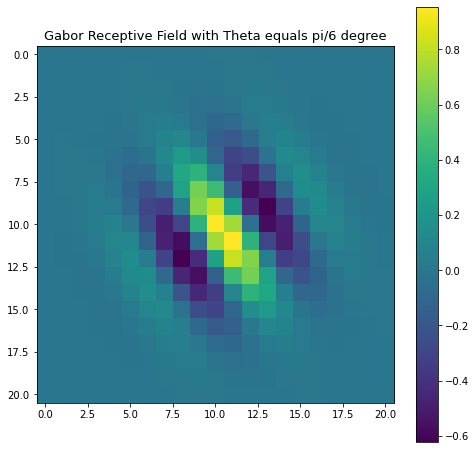

<Figure size 432x288 with 0 Axes>

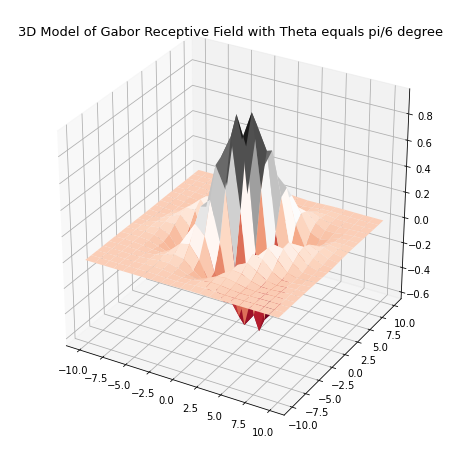

<Figure size 432x288 with 0 Axes>

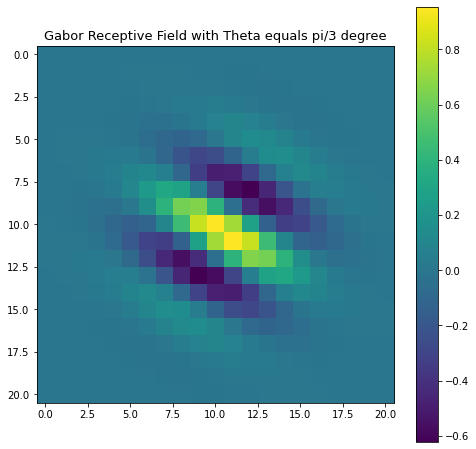

<Figure size 432x288 with 0 Axes>

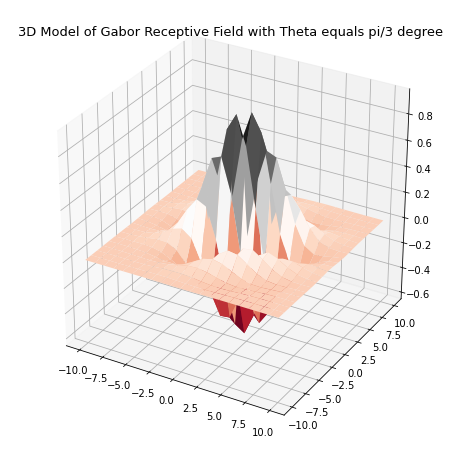

<Figure size 432x288 with 0 Axes>

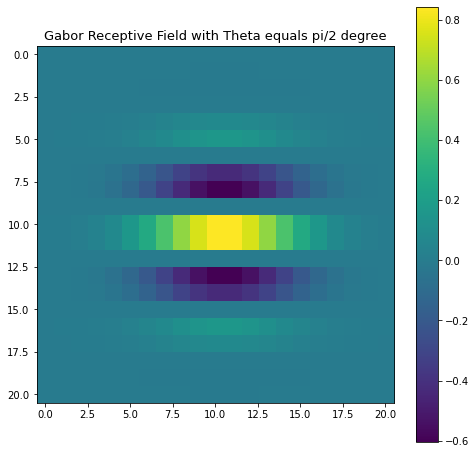

<Figure size 432x288 with 0 Axes>

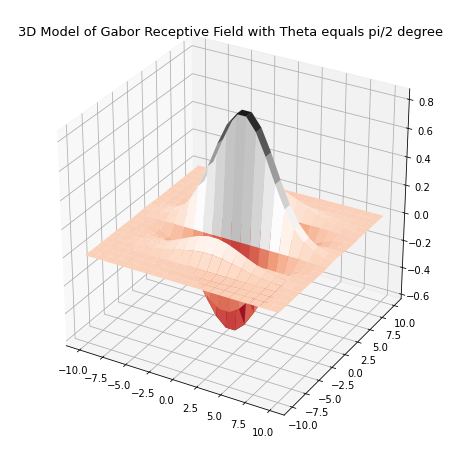

In [12]:
#Part F

thetas = [[0,0], [math.pi/6,6], [math.pi/3,3], [math.pi/2,2]]
for i,j in thetas:
    # Gabor Receptive fields for different thetas
    gabor_field = Gabor_receptive_field(21, 21, 3, 3, 6, i, 0)
    
    # Plot for all Gabor Receptive Fields
    figure += 1
    mpl.figure(figure)
    mpl.figure(figsize=(8,8))
    mpl.title('Gabor Receptive Field with Theta equals %s degree' % (('pi/%d' %j) if j != 0 else '0'),fontsize=13)
    mpl.imshow(gabor_field)
    mpl.colorbar()
    mpl.show()
    
    # 3D plot for all Gabor Receptive Fields
    figure += 1
    mpl.figure(figure)
    mpl.figure(figsize=(8,8))
    X = Y = np.linspace(-10, 10, 21)
    X, Y = np.meshgrid(X, Y)
    mpl.axes(projection='3d').plot_surface(X, Y, gabor_field, cmap='RdGy', edgecolor='none')
    mpl.title('3D Model of Gabor Receptive Field with Theta equals %s degree' % (('pi/%d' %j) if j != 0 else '0'), fontsize=13)
    mpl.show()

<Figure size 432x288 with 0 Axes>

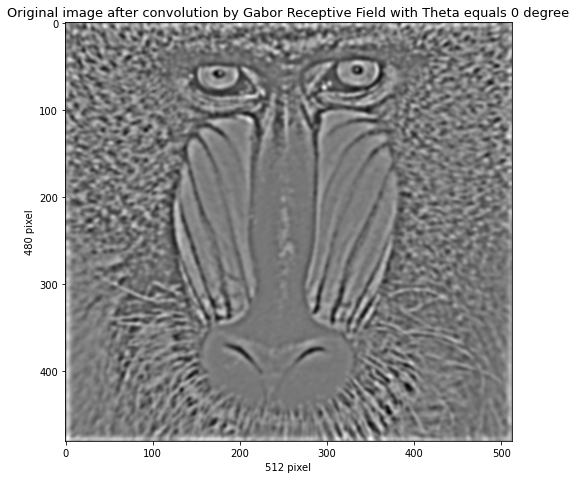

<Figure size 432x288 with 0 Axes>

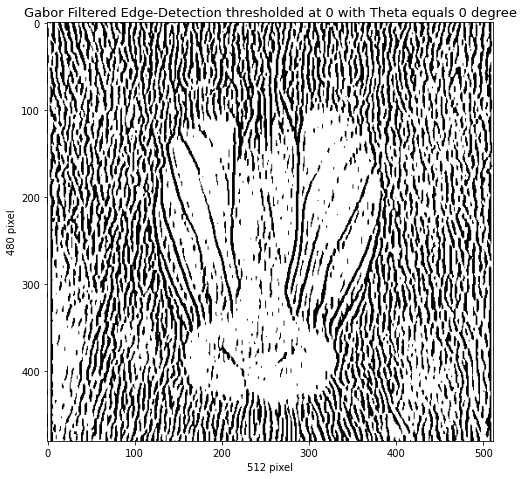

<Figure size 432x288 with 0 Axes>

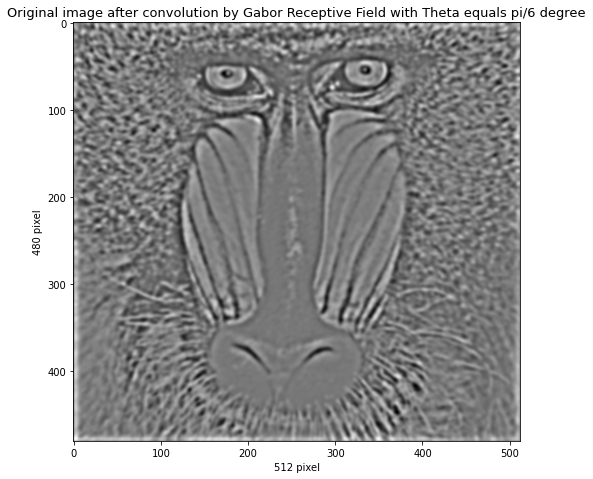

<Figure size 432x288 with 0 Axes>

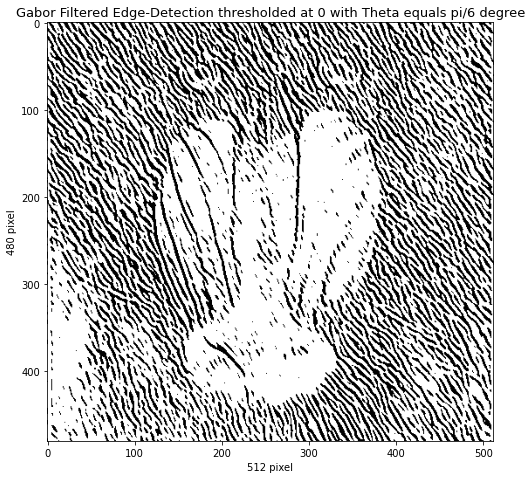

<Figure size 432x288 with 0 Axes>

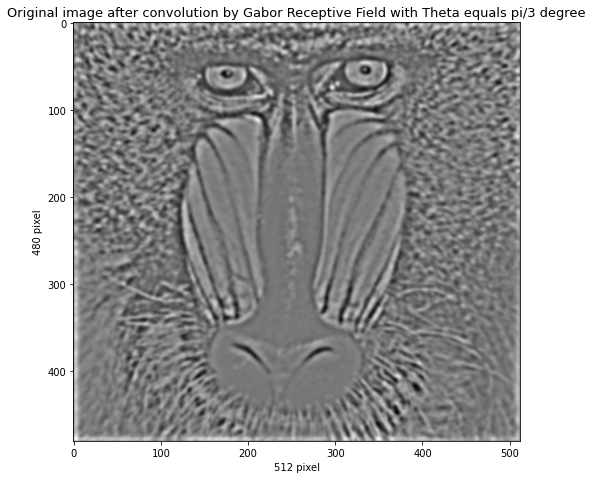

<Figure size 432x288 with 0 Axes>

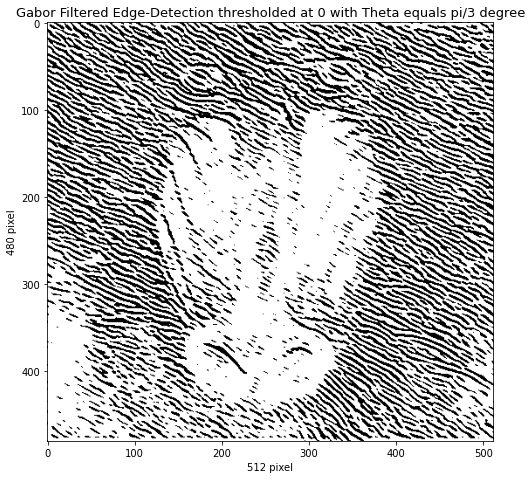

<Figure size 432x288 with 0 Axes>

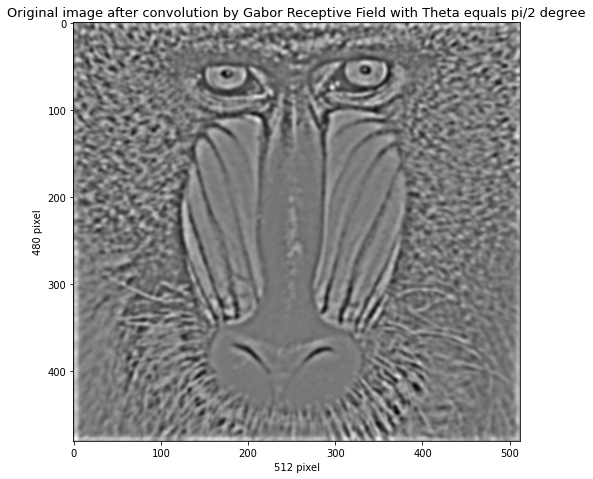

<Figure size 432x288 with 0 Axes>

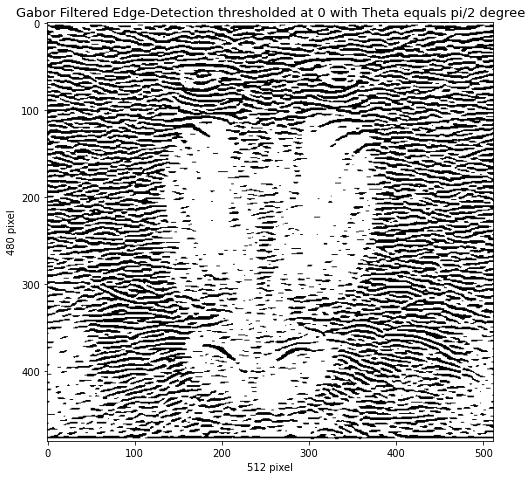

<Figure size 432x288 with 0 Axes>

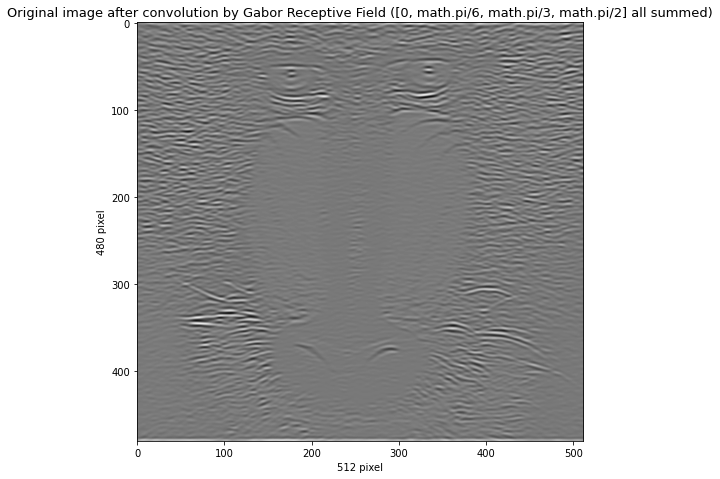

<Figure size 432x288 with 0 Axes>

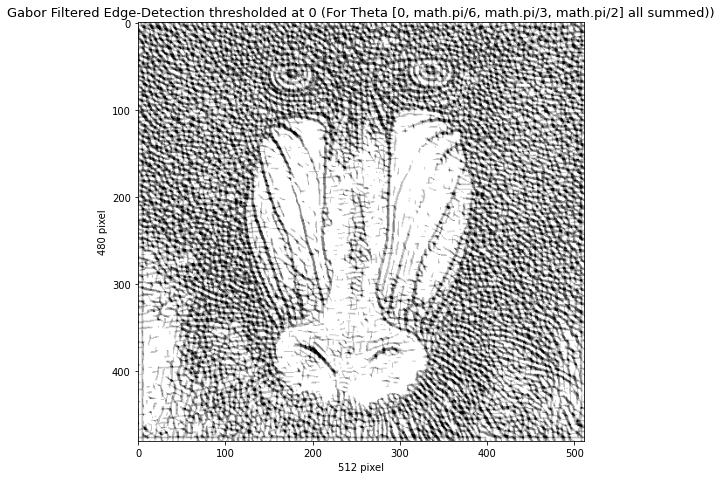

In [13]:
gabor_image_combined = np.empty(np.shape(convolved_gabor_image))
edged_gabor_image_combined = np.empty(np.shape(convolved_gabor_image))
for i,j in thetas:
    
    # For convolution
    gabor_field = Gabor_receptive_field(21, 21, 3, 3, 6, i, 0)
    # Convolution plotting
    figure += 1
    mpl.figure(figure)
    mpl.figure(figsize=(8,8))
    convolved_gabor_image = scipy.signal.convolve(original_image[:, :, 1], gabor_field, mode='same')   
    mpl.imshow(convolved_image, cmap='gray')
    mpl.title('Original image after convolution by Gabor Receptive Field with Theta equals %s degree' % (('pi/%d' %j) if j != 0 else '0') , fontsize=13)
    mpl.xlabel('512 pixel')
    mpl.ylabel('480 pixel')
    mpl.show()
    
    # Sum up all the images from convolution
    gabor_image_combined += convolved_gabor_image
    
    # For Edge Detection
    edged_gabor_image = edge_detect(convolved_gabor_image,0)
    
    # Edge Detection Plotting
    figure += 1
    mpl.figure(figure)
    mpl.figure(figsize=(8,8))
    mpl.imshow(edged_gabor_image, cmap='gray')
    mpl.title('Gabor Filtered Edge-Detection thresholded at 0 with Theta equals %s degree' % (('pi/%d' %j) if j != 0 else '0') , fontsize=13)
    mpl.xlabel('512 pixel')
    mpl.ylabel('480 pixel')
    mpl.show()
    
    # Sum up all the images from Edge Detection
    edged_gabor_image_combined += edged_gabor_image

# Plot summed up convolved images
figure += 1
mpl.figure(figure)
mpl.figure(figsize=(8,8))
convolved_image = scipy.signal.convolve(original_image[:, :, 1], gabor_field, mode='same')   
mpl.imshow(convolved_image, cmap='gray')
mpl.title('Original image after convolution by Gabor Receptive Field ([0, math.pi/6, math.pi/3, math.pi/2] all summed)', fontsize=13)
mpl.xlabel('512 pixel')
mpl.ylabel('480 pixel')
mpl.show()

# Plot summed up edge detected images
figure += 1
mpl.figure(figure)
mpl.figure(figsize=(8,8))
mpl.imshow(edged_gabor_image_combined, cmap='gray')
mpl.title('Gabor Filtered Edge-Detection thresholded at 0 (For Theta [0, math.pi/6, math.pi/3, math.pi/2] all summed))' , fontsize=13)
mpl.xlabel('512 pixel')
mpl.ylabel('480 pixel')
mpl.show()